# Vector, line and significance plots


# cfp.vect - vector plots



In [1]:
# Inline images in Ipython Notebook - not needed in Python
%matplotlib inline

# Import cf-python and cf-plot packages
import cf
import cfplot as cfp


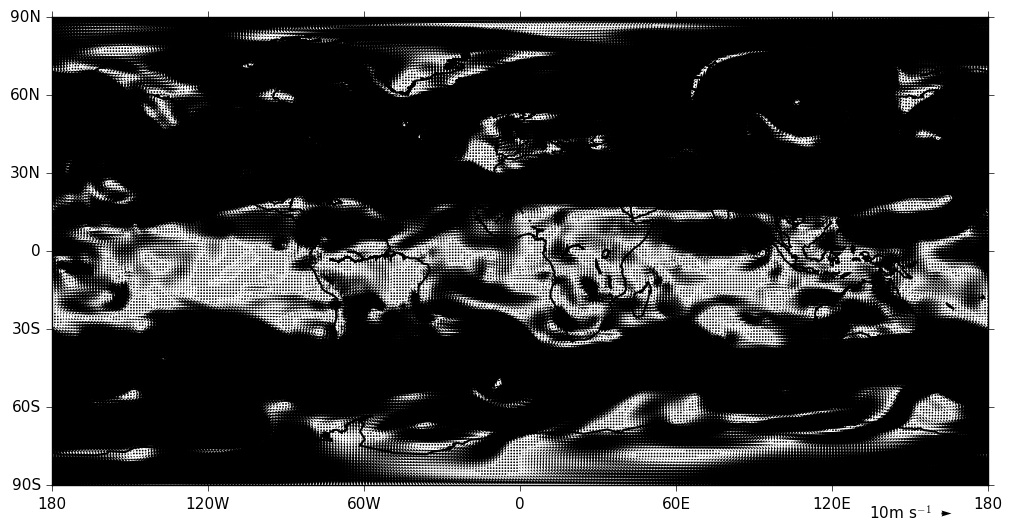

In [2]:
# Select u and v wind components at 500mb and make a vector plot
f=cf.read('ncas_data/data1.nc')
u=f[7].subspace(pressure=500)
v=f[9].subspace(pressure=500)
cfp.vect(u=u, v=v, key_length=10, scale=100)

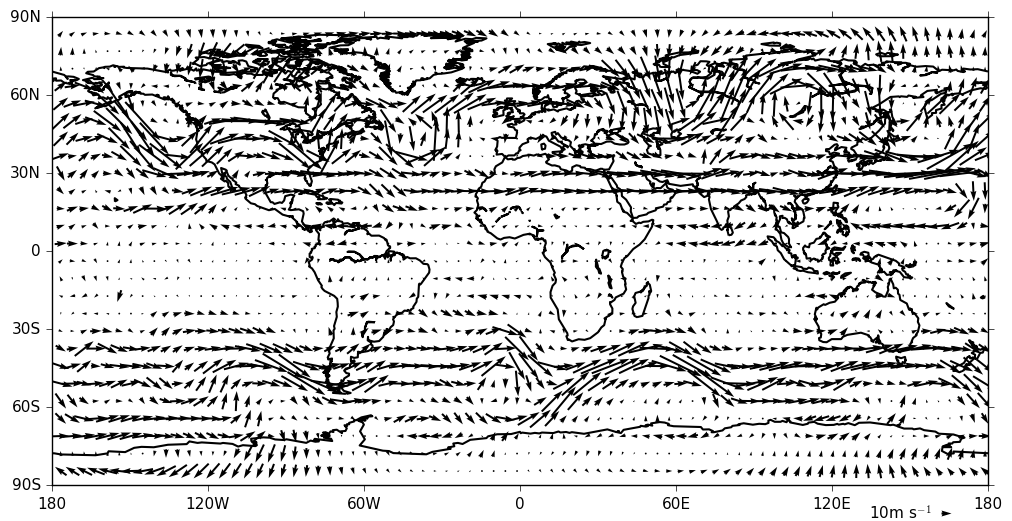

In [4]:
# In the example above we have too many points for the vectors to be discernable 
# We can use a stride of 4 in plotting the vectors to thin out the vectors
cfp.vect(u=u, v=v, key_length=10, scale=100, stride=[4,6])

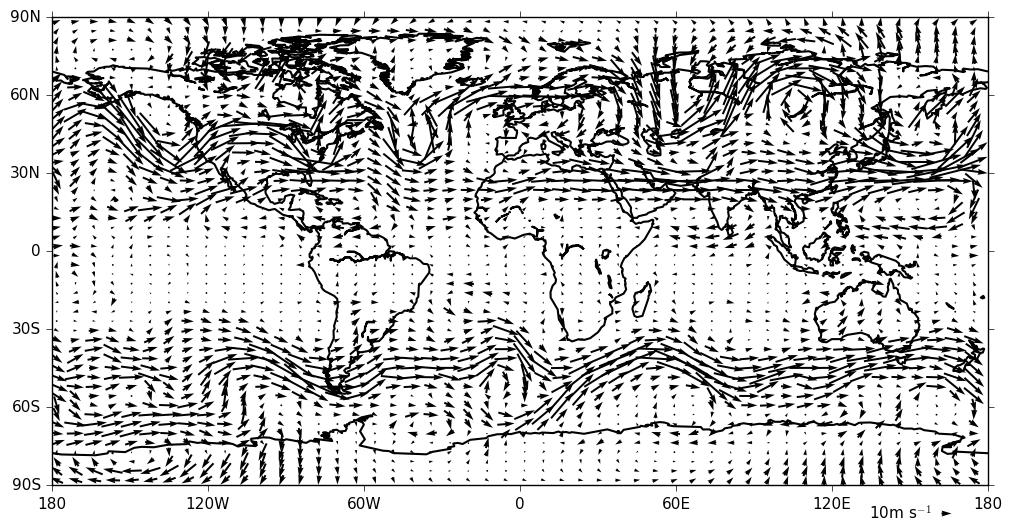

In [5]:
# The pts parameter controls the interpolation of the vectors to a new grid
# One value will give the same number of points in both directions
cfp.vect(u=u, v=v, key_length=10, scale=100, pts=50)

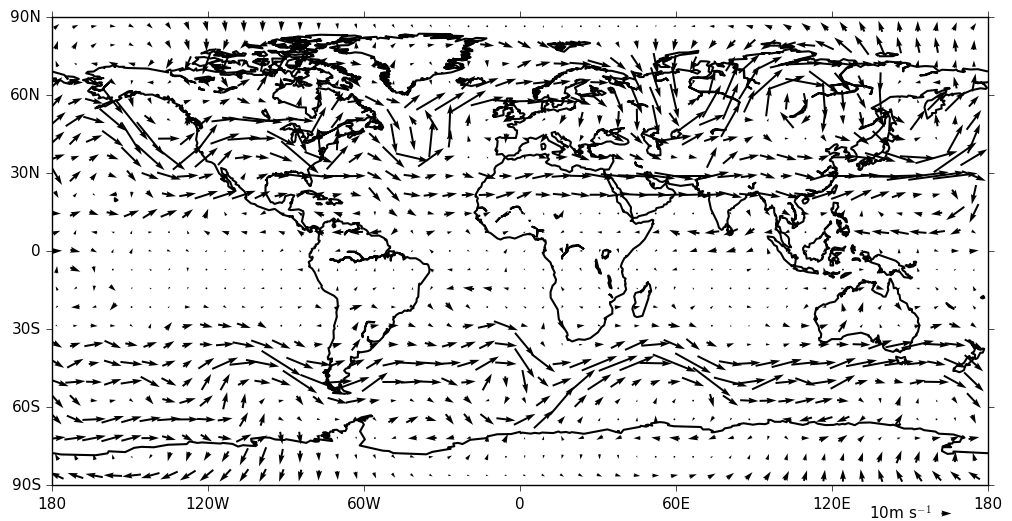

In [6]:
# Two values gives different nuymbers of points in each direction
cfp.vect(u=u, v=v, key_length=10, scale=100, pts=[50, 25])

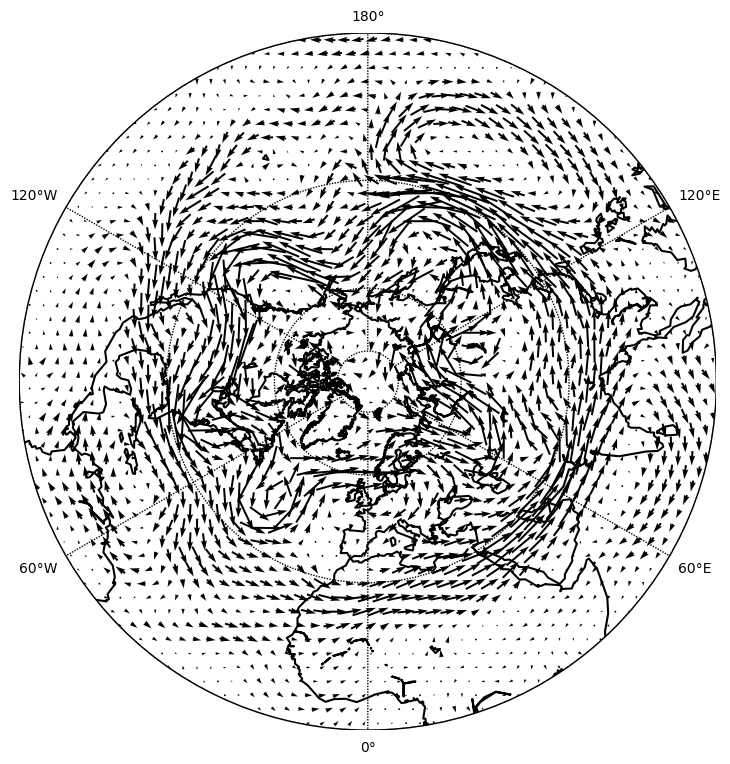

In [7]:
# When making polar stereographic plots use the pts keyword to cfp.vect 
# to specify the number of interpolated points in x and y
cfp.mapset(proj='npstere')
cfp.vect(u=u, v=v, key_length=10, scale=100, pts=50)

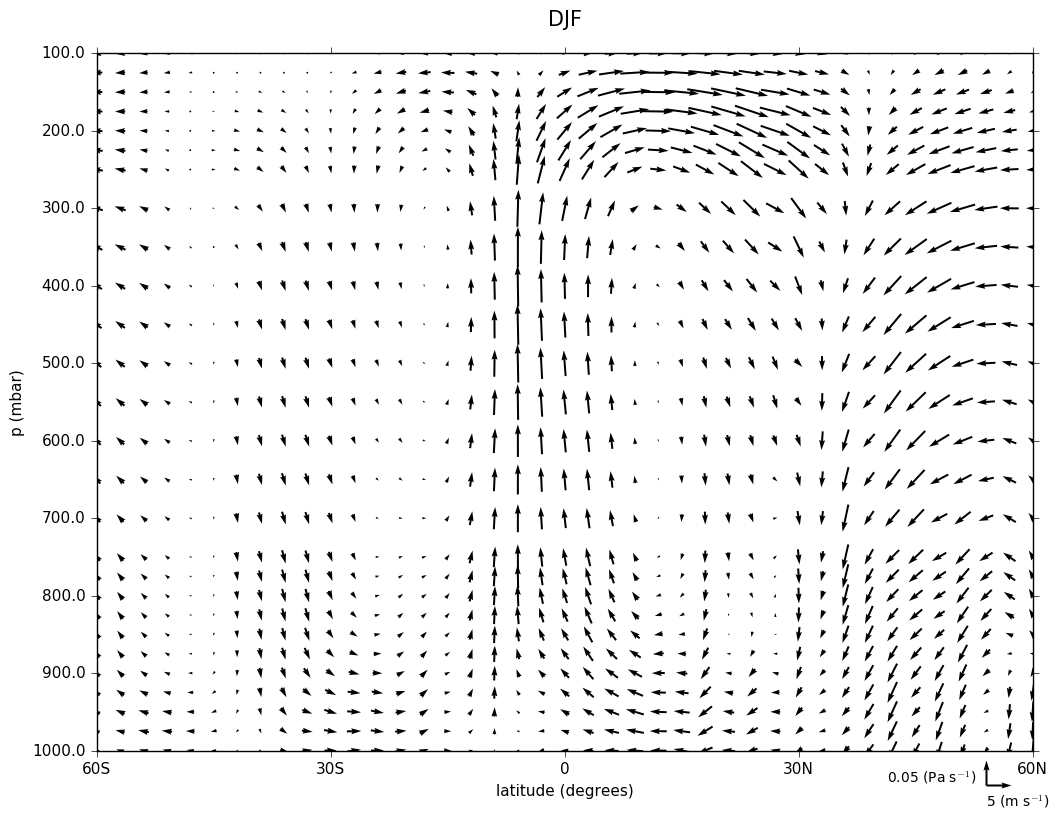

In [8]:
# Vectors can have different lengths and scales as in the example below
c=cf.read('ncas_data/vaAMIPlcd_DJF.nc')[0]
c=c.subspace(Y=cf.wi(-60,60))
c=c.subspace(X=cf.wi(80,160))
c=c.collapse('T: mean X: mean')

g=cf.read('ncas_data/wapAMIPlcd_DJF.nc')[0]
g=g.subspace(Y=cf.wi(-60,60))
g=g.subspace(X=cf.wi(80,160))
g=g.collapse('T: mean X: mean')

cfp.vect(u=c, v=-g, key_length=[5, 0.05], scale=[20,0.2], title='DJF', key_location=[0.95, -0.05])

In [ ]:
# Making overlaying plots
# In this case we will make a vector plot overlaying a contour plot
# Plots overlaying each other or multiple plots on a page need to be
# enclosed within a cfp.gopen() cfp.gclose() pair.  See additional
# material on multiple plots in the cf-plot directory.

import cf, cfplot as cfp
f=cf.read('../ncas_data/data1.nc')
u=f[7].subspace(pressure=500)
v=f[9].subspace(pressure=500)
t=f[2].subspace(pressure=500)

cfp.gopen()
cfp.mapset(lonmin=10, lonmax=120, latmin=-30, latmax=30)
cfp.levs(min=254, max=270, step=1)
cfp.con(t)
cfp.vect(u=u, v=v, key_length=10, scale=50, stride=2)
cfp.gclose()

# cfp-lineplot - making line plots



In [ ]:
# Read in some temerature data and convert to Celsius
f = cf.read('ncas_data/data1.nc')[2]
f = f.collapse('mean','longitude')
f.Units -= 273.15

In [ ]:
# Reset the plotting limits
cfp.gset()

In [ ]:
f.item('latitude').array

In [ ]:
# We cannot select on one of these values as they are Gaussian latitudes
# and numeric representation rounding comes into effect
g=f.subspace(latitude=0.56074494)



In [ ]:
# Set a lower matching tolerance value
tol=cf.RTOL(1e-5)
g=f.subspace(latitude=0.56074494)
cfp.lineplot(g)


In [ ]:
cfp.gopen()
cfp.gset(xmin=-100,xmax=30, ymin=1000, ymax=0)
yticks=[1000, 900,800,700, 600,500,400,300,200,100,0]
cfp.lineplot(f.subspace(latitude=0.56074494), label='0.56074494', color='b')
cfp.lineplot(f.subspace(latitude=70.09268951), label='70.09268951', color='g', yticks=yticks)
cfp.lineplot(f.subspace(latitude=-62.24246216), label='-62.24246216', color='r')
cfp.gclose()

# cfp.stipple - Significance plots
## plotting areas of significance with coloured symbols

In [ ]:
cfp.mapset()
cfp.levs()
f=cf.read('ncas_data/data4.nc')[0]
g=f.subspace(time=15)
cfp.gopen()
cfp.cscale('magma')
cfp.con(g)
cfp.stipple(f=g, min=265, max=295, size=100, color='#00ff00')
cfp.gclose()

In [ ]:
cfp.gopen()
cfp.cscale()
f=cf.read('/opt/graphics/cfplot_data/ggap.nc')[7]
g=f.collapse('mean','longitude')
cfp.con(g)
cfp.stipple(f=g, min=30, max=100, size=100, color='grey')
cfp.gclose()




